In [74]:
import matplotlib.pyplot as plt
from strategies import SimpleRSIStrategy
from volume_based_indicator import *
from data_sources import get_resampled_prices_in_range

# Initial settings
transaction_currency =  "REP" #""ETH"
counter_currency = "USDT" #""BTC"
end_time = 1530241441
start_time = end_time - 60 * 60 * 24 * 4
#end_time += 60*60*15
horizon = Horizon.short
resample_period = 60
start_cash = 1
start_crypto = 0
source = 0
strength = 3
AVERAGING_PERIOD = 50

# fill kwargs structure, needed later
kwargs = {}
kwargs['source'] = source
kwargs['transaction_currency'] = transaction_currency
kwargs['counter_currency'] = counter_currency
kwargs['start_time'] = start_time
kwargs['end_time'] = end_time
kwargs['horizon'] = horizon

# Load price and volume data and calculate average prices and volumes
prices_df = get_resampled_prices_in_range(start_time, end_time, transaction_currency, counter_currency, resample_period, source,
            normalize=False)
prices_df = prices_df.sort_index()

volumes_df = get_volumes_in_range(start_time, end_time, transaction_currency, counter_currency, source)
#volumes_df.volume /= 1E4 #5 # scaling for visualization

prices_avg = talib.SMA(np.array(prices_df.close_price, dtype=float), timeperiod=AVERAGING_PERIOD)
prices_df['average_price'] = pd.Series(prices_avg, index=prices_df.index)

if not volumes_df.index.is_unique:
    start_len = len(volumes_df)
    volumes_df = volumes_df[~volumes_df.index.duplicated(keep='first')]
    print(" --> reduced size of volume dataframe from {} to {} because of duplicate data.".format(
        start_len, len(volumes_df)
    ))

volumes_reindexed_df = volumes_df.reindex(prices_df.index, method='nearest')  # TODO find a better way
volumes_reindexed_df = volumes_reindexed_df[~volumes_reindexed_df.index.duplicated()]
volumes_reindexed_df = volumes_reindexed_df.sort_index()

price_volume_df = prices_df.join(volumes_reindexed_df, how='inner')  # to make sure timestamps match
price_volume_df = price_volume_df.sort_index()
volumes_avg = talib.SMA(np.array(price_volume_df['volume'], dtype=float), timeperiod=AVERAGING_PERIOD)



price_volume_df['average_volume'] = pd.Series(volumes_avg, index=price_volume_df.index)


# Convert indexes to datetime
prices_df.index = pd.to_datetime(prices_df.index, unit='s', utc=True)
volumes_df.index = pd.to_datetime(volumes_df.index, unit='s', utc=True)
price_volume_df.index = pd.to_datetime(price_volume_df.index, unit='s', utc=True)

# rename columns so the rest of the code is compatible
price_volume_df = price_volume_df.rename(columns={'close_price': 'price'})

#write_to_excel(prices_df, "prices.xlsx")
#write_to_excel(price_volume_df, "prices_volumes.xlsx")
#write_to_excel(volumes_reindexed_df, "volumes_reindexed.xlsx")



 --> reduced size of volume dataframe from 5545 to 5544 because of duplicate data.


In [75]:
volumes_reindexed_df.index = pd.to_datetime(volumes_reindexed_df.index, unit='s', utc=True)
volumes_reindexed_df

,volume
timestamp,
2018-06-25 04:03:00+00:00,3024.747292
2018-06-25 05:02:00+00:00,2796.285890
2018-06-25 06:01:00+00:00,2798.118522
2018-06-25 07:02:00+00:00,2625.911379
2018-06-25 08:02:00+00:00,2675.095614
2018-06-25 09:03:00+00:00,2114.386404
2018-06-25 10:02:00+00:00,1703.730410
2018-06-25 11:03:00+00:00,1676.350650
2018-06-25 12:03:00+00:00,1801.508158


In [76]:
# First test of a VBI-based strategy
strategy, all_buy_signals, first_cross_buy_signals = build_strategy(price_volume_df, 0.02, 0.02, 
                                                                    buy_only_on_first_cross=True, sell_strategy=None, **kwargs)
orders, _ = strategy.get_orders(start_cash, start_crypto)

All buy
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 20:10:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 21:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 22:04:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0


D:\Development\ToptalProjects\IntelligentTrading\ITTscience\backtesting\volume_based_indicator.py:25: RuntimeWarning: invalid value encountered in greater
  if price > (1 + percent_change_price)*avg_price and volume > (1 + percent_change_volume)*avg_volume:


In [77]:
#write_to_excel(volumes_df, "volumes.xlsx")
#write_to_excel(volumes_reindexed_df, "volumes_reindexed.xlsx")

In [78]:
for signal in all_buy_signals:
    print(str(signal), signal.price)
    
print("FIRST CROSS:")
    
for signal in first_cross_buy_signals:
    print(str(signal), signal.price)



rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0 3356805690
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 20:10:00 rsi_value=0 3500000039
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 21:04:00 rsi_value=0 3400015513
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 22:04:00 rsi_value=0 3219578022
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0 3223781099
FIRST CROSS:
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:04:00 rsi_value=0 3356805690
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 03:04:00 rsi_value=0 3223781099


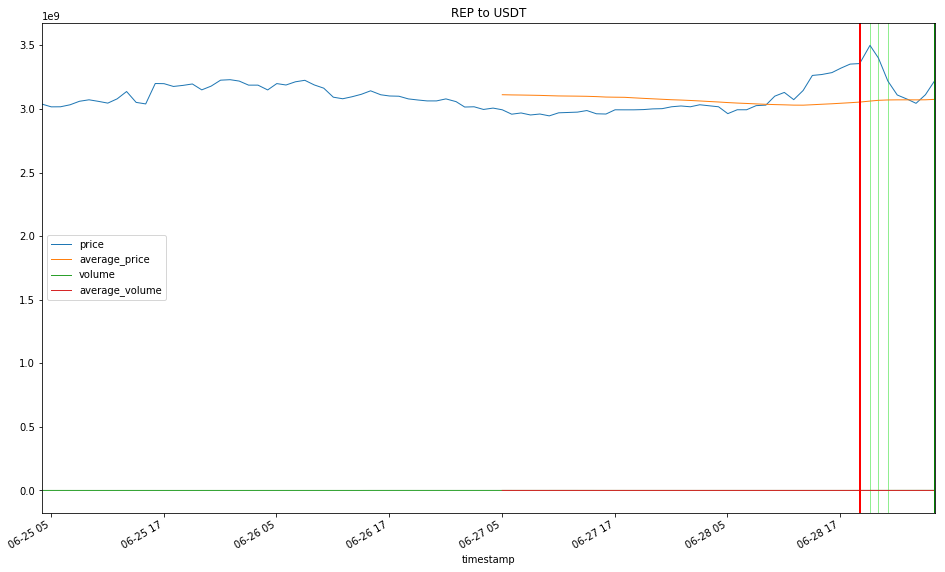

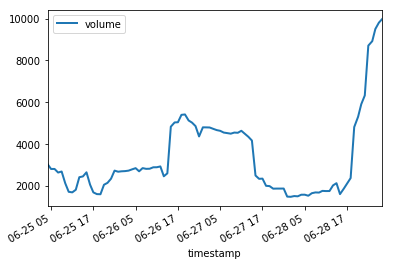

In [79]:
price_volume_df_plot = price_volume_df.copy()
price_volume_df_plot['volume'] *= 50
price_volume_df_plot['average_volume'] *= 50
plot_results(price_volume_df_plot, volumes_reindexed_df, transaction_currency, counter_currency, all_buy_signals,
             first_cross_buy_signals, orders, include_all_buy=True, include_first_cross=True, include_orders=True)



In [73]:
price_volume_df['div_price'] = price_volume_df['price'] / price_volume_df['average_price'] * 100
price_volume_df['div_volume'] = price_volume_df['volume'] / price_volume_df['average_volume'] * 100
price_volume_df

,price,average_price,volume,average_volume,div_price,div_volume
timestamp,,,,,,
2018-06-25 04:02:00+00:00,489660,NaN,3870.641246,NaN,NaN,NaN
2018-06-25 05:01:00+00:00,494481,NaN,3694.561288,NaN,NaN,NaN
2018-06-25 06:01:00+00:00,493622,NaN,3719.984667,NaN,NaN,NaN
2018-06-25 07:01:00+00:00,496827,NaN,3596.335337,NaN,NaN,NaN
2018-06-25 08:01:00+00:00,495433,NaN,3571.577892,NaN,NaN,NaN
2018-06-25 09:02:00+00:00,495346,NaN,3542.495443,NaN,NaN,NaN
2018-06-25 10:01:00+00:00,495053,NaN,3219.750199,NaN,NaN,NaN
2018-06-25 11:02:00+00:00,493000,NaN,3107.524096,NaN,NaN,NaN
2018-06-25 12:02:00+00:00,497582,NaN,3804.812956,NaN,NaN,NaN


D:\Development\ToptalProjects\IntelligentTrading\ITTscience\backtesting\volume_based_indicator.py:25: RuntimeWarning: invalid value encountered in greater
  if price > (1 + percent_change_price)*avg_price and volume > (1 + percent_change_volume)*avg_volume:


All buy
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 15:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 16:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 17:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 18:07:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 19:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 20:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 21:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 22:07:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-28 23:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 00:02:00 rsi_value=0
rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-06-29 01:02:00 rsi

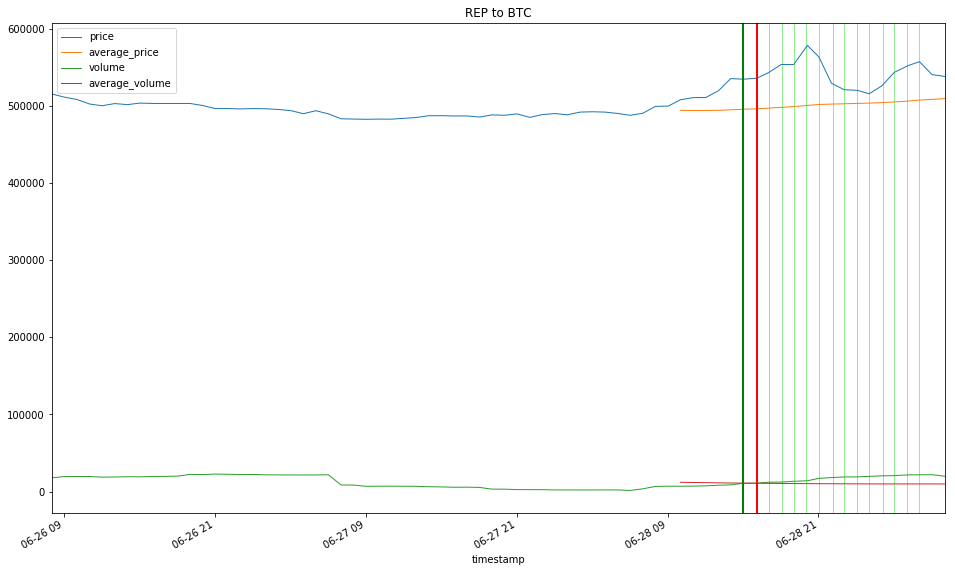

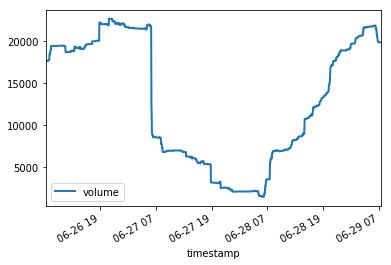

In [8]:
price_volume_df = price_volume_df.sort_index()
strategy, all_buy_signals, first_cross_buy_signals = build_strategy(price_volume_df, 0.02, 0.02, 
                                                                    buy_only_on_first_cross=True, sell_strategy=None, **kwargs)
orders, _ = strategy.get_orders(start_cash, start_crypto)
plot_results(price_volume_df, volumes_df, transaction_currency, counter_currency, all_buy_signals,
             first_cross_buy_signals, orders, include_all_buy=True, include_first_cross=False, include_orders=True)

In [15]:
volumes_df

,volume
timestamp,
2018-06-26 07:21:07.178,17649.863708
2018-06-26 07:22:07.456,17644.328510
2018-06-26 07:23:07.366,17644.328510
2018-06-26 07:24:07.433,17644.328510
2018-06-26 07:25:07.446,17644.328510
2018-06-26 07:26:07.569,17644.306710
2018-06-26 07:27:07.562,17644.306710
2018-06-26 07:28:07.803,17644.257747
2018-06-26 07:29:07.912,17644.257747


,volume
timestamp,
2018-06-26 08:01:00,17739.591150
2018-06-26 09:01:00,19424.613698
2018-06-26 10:01:00,19433.711208
2018-06-26 11:01:00,19461.424928
2018-06-26 12:01:00,18693.441567
2018-06-26 13:01:00,18856.012098
2018-06-26 14:01:00,19204.018554
2018-06-26 15:01:00,19076.075863
2018-06-26 16:05:00,19553.005164


In [34]:
price_volume_df

,price,average_price,volume,average_volume
timestamp,,,,
2018-06-26 08:01:00,515591,NaN,17739.591150,NaN
2018-06-26 09:01:00,511413,509083.52,19424.613698,13459.234426
2018-06-26 10:01:00,508383,508665.52,19433.711208,13140.698784
2018-06-26 11:01:00,502548,508304.56,19461.424928,12793.763241
2018-06-26 12:01:00,500262,508094.26,18693.441567,12446.809752
2018-06-26 13:01:00,503113,507892.16,18856.012098,12113.249159
2018-06-26 14:01:00,501737,507606.56,19204.018554,11783.572693
2018-06-26 15:01:00,503703,507275.36,19076.075863,11449.169237
2018-06-26 16:05:00,503246,506959.94,19553.005164,11129.209165


In [17]:
volumes_avg


array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  11967.50044955,  11753.12911226,  11511.14210893,
        11286.48611009,  

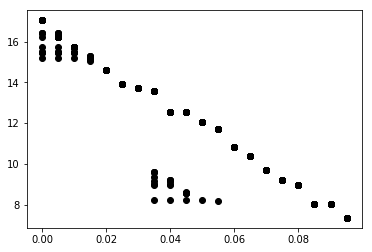

In [23]:
plt.plot(profit_df["Price change percent"], profit_df["Profit percent"], 'o', color='black');

In [24]:
# Find best performing parameters
sorted_by_profit = profit_df.sort_values("Profit percent", inplace=False, ascending=False)
sorted_by_profit

,Volume change percent,Price change percent,Profit percent
200,0.050,0.000,17.048724
240,0.060,0.000,17.048724
220,0.055,0.000,17.048724
180,0.045,0.000,17.048724
160,0.040,0.000,17.048724
140,0.035,0.000,17.048724
120,0.030,0.000,17.048724
100,0.025,0.000,17.048724
80,0.020,0.000,17.048724
60,0.015,0.000,17.048724


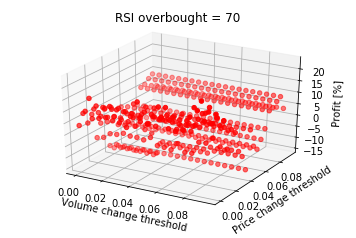

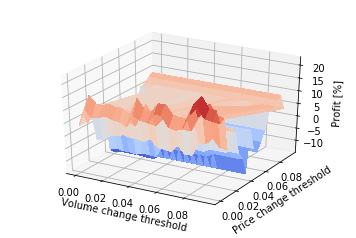

In [25]:
# Explore how RSI overbought influences the results
all_results = None
oversold_threshold = 20 # not used
for overbought_threshold in range(70,100):
    sell_strategy = SimpleRSIStrategy(start_time, end_time, horizon, counter_currency, 
                                      overbought_threshold, oversold_threshold, 
                                      transaction_currency, "RSI", source)
    profit_df = calculate_profits(price_volume_df, start_cash, start_crypto, sell_strategy, **kwargs)
    profit_df['RSI overbought'] = pd.Series([overbought_threshold] * len(profit_df), index=profit_df.index)
    if all_results is None:
        all_results = profit_df
    else:
        all_results = all_results.append(profit_df, ignore_index=True)
    plot_profit_df(profit_df, "RSI overbought = {}".format(overbought_threshold))

In [9]:
all_results


,Volume change percent,Price change percent,Profit percent,RSI overbought
0,0.000,0.000,3.721297,70
1,0.000,0.005,7.983631,70
2,0.000,0.010,2.845531,70
3,0.000,0.015,5.637999,70
4,0.000,0.020,-5.566875,70
5,0.000,0.025,-0.127126,70
6,0.000,0.030,5.021356,70
7,0.000,0.035,-12.182607,70
8,0.000,0.040,-14.223728,70
9,0.000,0.045,-14.197139,70


In [10]:
sorted_by_profit = all_results.sort_values("Profit percent", inplace=False, ascending=False)
sorted_by_profit

,Volume change percent,Price change percent,Profit percent,RSI overbought
3021,0.055,0.005,29.291932,77
3821,0.055,0.005,28.891321,79
3421,0.055,0.005,28.891321,78
4220,0.055,0.000,26.717212,80
2841,0.010,0.005,26.422021,77
2861,0.015,0.005,26.317084,77
3241,0.010,0.005,26.030302,78
3641,0.010,0.005,26.030302,79
2881,0.020,0.005,26.000622,77
3261,0.015,0.005,25.925690,78


In [66]:
write_to_excel(all_results, "vbi_backtesting_btc_usdt.xlsx")

Strategy: a simple RSI-based strategy
  description: selling when rsi_value >= overbought_threshold, buying when rsi_value <= oversold threshold 
Strategy settings:
  overbought_threshold = 77.0
  oversold_threshold = 20
  horizon = short
--

* Order execution log *

Start balance: cash = 1000 USDT, crypto = 0 
Start time: 2018-03-19 10:00:00
--
--
2018-04-12 09:12:15  	 OrderType.BUY    	 cash_balance ->      -1000.00 USDT 	 currency_balance ->      0.137904 BTC 	 (1 BTC = 7233.31147998 USDT )
   signal: rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-04-12 09:12:15 rsi_value=0
2018-04-12 13:00:00  	 OrderType.SELL   	 cash_balance ->       1059.88 USDT 	 currency_balance ->     -0.137904 BTC 	 (1 BTC = 7704.91226307 USDT )
   signal: rsi_sell_3 strength=3 trend=-1 horizon=0 timestamp=2018-04-12 13:00:00 rsi_value=84.3614320198976
2018-04-20 20:45:49  	 OrderType.BUY    	 cash_balance ->      -1059.88 USDT 	 currency_balance ->      0.120276 BTC 	 (1 BTC = 8790.0000000

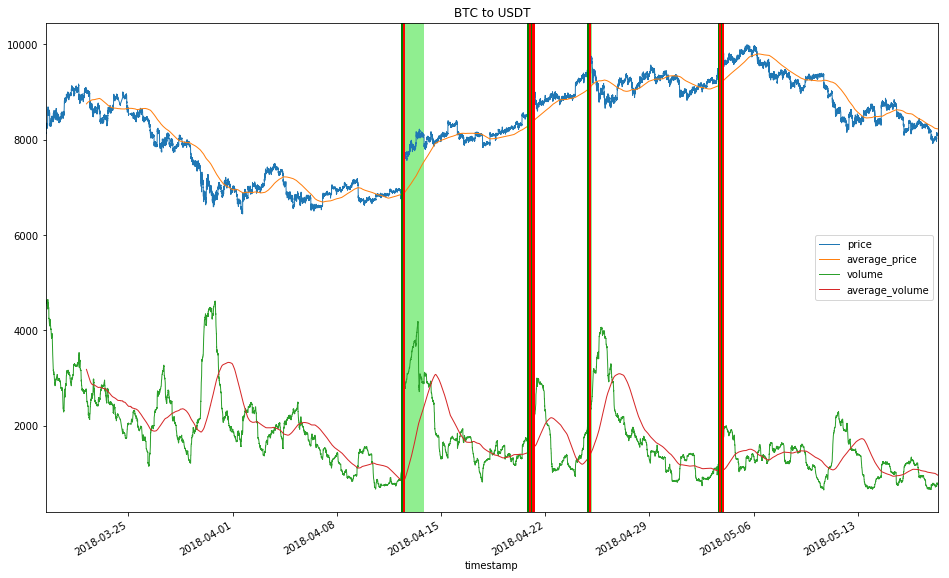

In [12]:
# Analyze the best parameter combination
overbought_threshold = sorted_by_profit.iloc[0]["RSI overbought"]
percent_change_volume = sorted_by_profit.iloc[0]["Volume change percent"]
percent_change_price = sorted_by_profit.iloc[0]["Price change percent"]

sell_strategy = SimpleRSIStrategy(start_time, end_time, horizon, counter_currency, 
                                      overbought_threshold, oversold_threshold, 
                                      transaction_currency, "RSI", source)
strategy, all_buy_signals, first_cross_buy_signals = build_strategy(price_volume_df, percent_change_volume,
                                                                                percent_change_price,
                                                                                buy_only_on_first_cross=True,
                                                                                sell_strategy=sell_strategy, **kwargs)
orders, _ = strategy.get_orders(start_cash, start_crypto)
evaluation = strategy.evaluate(1000, start_crypto, start_time, end_time, verbose=True)

plot_results(price_volume_df, volumes_df, transaction_currency, counter_currency, all_buy_signals,
             first_cross_buy_signals, orders, include_all_buy=True, include_first_cross=False, include_orders=True)

In [13]:
# Let's establish the buy and hold and RSI baselines
from strategies import BuyAndHoldTimebasedStrategy
bah = BuyAndHoldTimebasedStrategy(start_time, end_time, transaction_currency, counter_currency, source)
bah.evaluate(start_cash, start_crypto, start_time, end_time)
rsi_strat = SimpleRSIStrategy(start_time, end_time, horizon, counter_currency, 
                              75, 25, transaction_currency, "RSI", source)
rsi_strat.evaluate(start_cash, start_crypto, start_time, end_time)

--

* Order execution log *

Start balance: cash = 1 USDT, crypto = 0 
Start time: 2018-03-19 10:00:00
--
--
2018-03-19 10:00:00  	 OrderType.BUY    	 cash_balance ->         -1.00 USDT 	 currency_balance ->      0.000122 BTC 	 (1 BTC = 8196.24900883 USDT )
2018-05-18 10:00:00  	 OrderType.SELL   	 cash_balance ->          0.98 USDT 	 currency_balance ->     -0.000122 BTC 	 (1 BTC = 8098.99000000 USDT )
End time: 2018-05-18 10:00:00

Summary
--
Number of trades: 2
End cash: 0.98 USDT
End crypto: 0.000000 BTC
Total value invested: 1 USDT
Total value after investment: 0.98 USDT (-1.68%)
Profit: -0.02 USDT
Strategy: a simple RSI-based strategy
  description: selling when rsi_value >= overbought_threshold, buying when rsi_value <= oversold threshold 
Strategy settings:
  overbought_threshold = 75
  oversold_threshold = 25
  horizon = short
--

* Order execution log *

Start balance: cash = 1 USDT, crypto = 0 
Start time: 2018-03-19 10:00:00
--
--
2018-03-26 13:00:00  	 OrderType.BUY    	 c

Strategy: a simple RSI-based strategy
  description: selling when rsi_value >= overbought_threshold, buying when rsi_value <= oversold threshold 
Strategy settings:
  overbought_threshold = 97
  oversold_threshold = 20
  horizon = short
--

* Order execution log *

Start balance: cash = 1 USDT, crypto = 0 
Start time: 2018-03-19 10:00:00
--
--
2018-04-02 05:54:49  	 OrderType.BUY    	 cash_balance ->         -1.00 USDT 	 currency_balance ->      0.000141 BTC 	 (1 BTC = 7090.89711199 USDT )
   signal: rsi_buy_3 strength=3 trend=1 horizon=Horizon.any timestamp=2018-04-02 05:54:49 rsi_value=0
End time: 2018-05-18 10:00:00

Summary
--
Number of trades: 1
End cash: 0.00 USDT
End crypto: 0.000141 BTC
Total value invested: 1 USDT
Total value after investment: 1.14 USDT (+13.93%)
Profit: 0.14 USDT


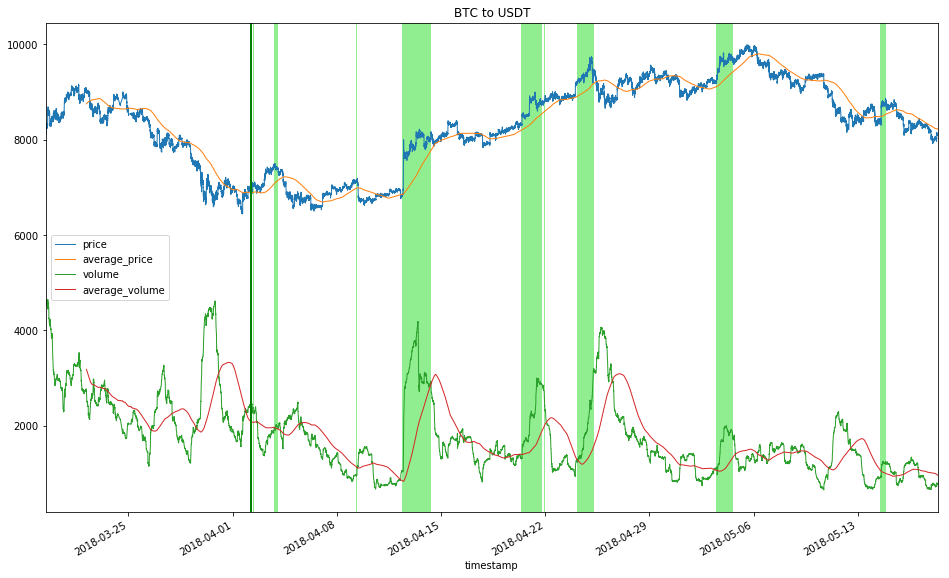

In [14]:
# Analyze the best parameter combination
overbought_threshold = 97#sorted_by_profit.iloc[0]["RSI overbought"]
percent_change_volume = sorted_by_profit.iloc[0]["Volume change percent"]/2
percent_change_price = sorted_by_profit.iloc[0]["Price change percent"]

sell_strategy = SimpleRSIStrategy(start_time, end_time, horizon, counter_currency, 
                                      overbought_threshold, oversold_threshold, 
                                      transaction_currency, "RSI", source)
strategy, all_buy_signals, first_cross_buy_signals = build_strategy(price_volume_df, percent_change_volume,
                                                                                percent_change_price,
                                                                                buy_only_on_first_cross=True,
                                                                                sell_strategy=sell_strategy, **kwargs)
orders, _ = strategy.get_orders(start_cash, start_crypto)
evaluation = strategy.evaluate(start_cash, start_crypto, start_time, end_time, verbose=True)

plot_results(price_volume_df, volumes_df, transaction_currency, counter_currency, all_buy_signals,
             first_cross_buy_signals, orders, include_all_buy=True, include_first_cross=False, include_orders=True)